In [1]:
import numpy as np
import sympy
from sympy import *
from sympy.abc import x, y
from sympy.matrices import eye
import math
from math import sin, cos, pi, e
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from _collections_abc import Iterable, Callable
%config InlineBackend.figure_format = 'retina'
sympy.init_printing()

In [2]:
def localError(x1, v1, h):
    A = sympy.Matrix([[-500.005, 499.995],[499.995, -500.005]])
    vv = v1
    E = eye(2)
    for i in range(1):
        vect = vv
        k1 = A*vect
        tt = (E + 0.5*h*A)#*A*vect
        t1 = E-h*0.5*A
        t1 = np.linalg.inv(np.asarray(t1).astype('float64'))
        k2 = t1*tt*A*vect
        #k2 = np.linalg.inv(np.asarray(E - A*h*0.5).astype('float64'))*(E + A*h*0.5)*A*vect
        t = vect + (k1 + k2)*h*0.5   
        #print(t)
    return t

Matrix([[5.54700392374485e-6], [-5.54700392640939e-6]]) 3.125e-05
Matrix([[5.37632688057954e-6], [-5.37632688057954e-6]]) 3.125e-05
Matrix([[5.21090143834613e-6], [-5.21090144012248e-6]]) 3.125e-05
Matrix([[5.05056600896836e-6], [-5.05056600985654e-6]]) 3.125e-05
Matrix([[4.89516397816914e-6], [-4.89516397905732e-6]]) 3.125e-05
Matrix([[4.74454354826293e-6], [-4.74454354737475e-6]]) 3.125e-05
Matrix([[4.59855759338268e-6], [-4.59855759338268e-6]]) 3.125e-05
Matrix([[4.45706351293040e-6], [-4.45706351293040e-6]]) 3.125e-05
Matrix([[4.31992309746221e-6], [-4.31992309657403e-6]]) 3.125e-05
Matrix([[4.18700238657976e-6], [-4.18700238569159e-6]]) 3.125e-05
Matrix([[4.05817154369714e-6], [-4.05817154280896e-6]]) 3.125e-05
Matrix([[3.93330472725495e-6], [-3.93330472725495e-6]]) 3.125e-05
Matrix([[3.81227996548716e-6], [-3.81227996548716e-6]]) 3.125e-05
Matrix([[3.69497904451066e-6], [-3.69497904451066e-6]]) 3.125e-05
Matrix([[2.77838307720657e-5], [-2.77838307738421e-5]]) 6.25e-05
Matrix([[2.

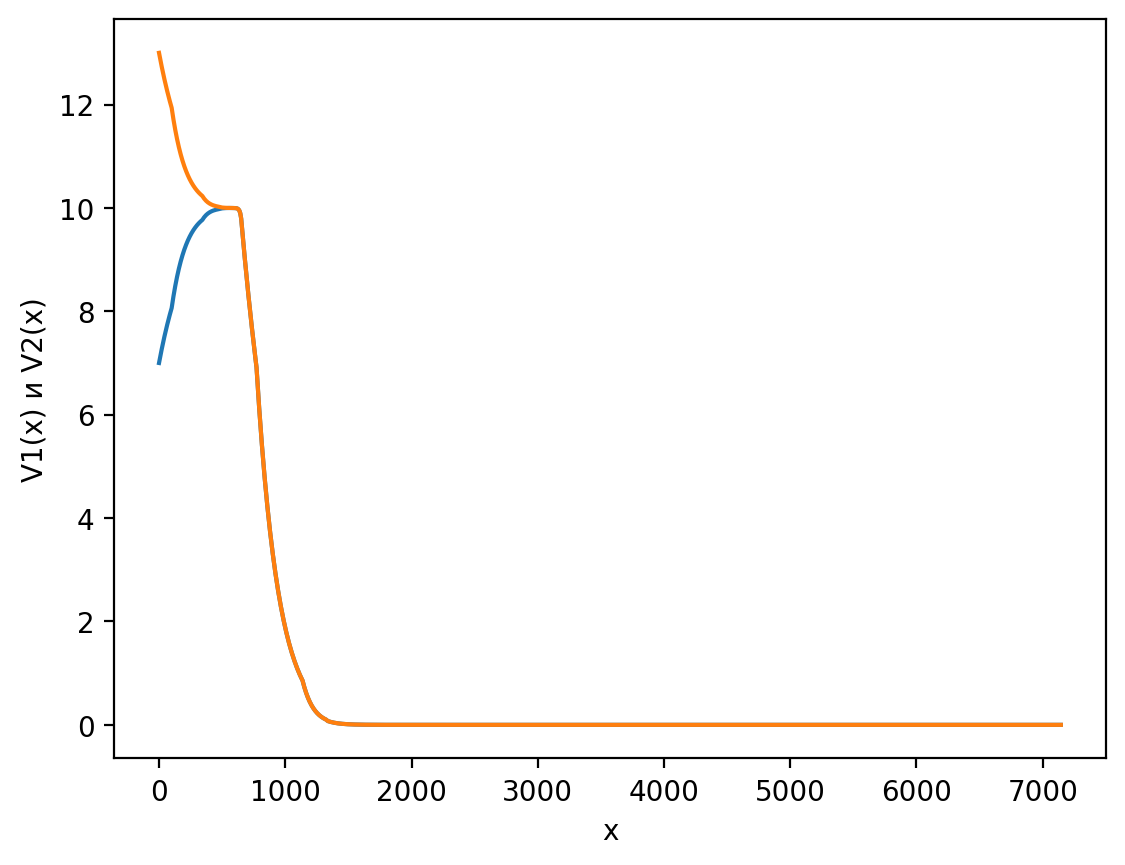

: 

In [100]:
# Поиск численного решения
A = sympy.Matrix([[-500.005, 499.995],[499.995, -500.005]])
x = []
v = []
n = 1000
h = 0.004
hh = h
E = eye(2)
E
x.append(0)
tmp  = sympy.Matrix([7,13])
v.append(tmp)
eps = 0.00001
i = 1
j = 0
corr = []
flag = False
while i < n and math.isclose(v[i-1][0], 1e-4, rel_tol=1e-2) == False:
    #print(v[i-1])
    #print(h)
        
    vect = v[i-1]
    k1 = A*vect
    tt = (E + 0.5*h*A)#*A*vect
    t1 = E-h*0.5*A
    t1 = np.linalg.inv(np.asarray(t1).astype('float64'))
    k2 = t1*tt*A*vect
    #k2 = np.linalg.inv(np.asarray(E - A*h*0.5).astype('float64'))*(E + A*h*0.5)*A*vect
    t = vect + (k1 + k2)*h*0.5

    v_check = localError(x[-1], vect, h/2)
    v_check = localError(x[-1], v_check, h/2)
    
    S = (v_check - t)/3.
    
    
    S1 = S[0]
    S2 = S[1]
    #S = S[1]
    if vect[0] > 0.1:
        if eps/8 <= abs(S1) <= eps and eps/8 <= abs(S2) <= eps:
            #tempX = round(x[i - 1] + h, len(str(h))-2)
            tempX = x[i-1] + h
            x.append(tempX)
            #v.append(t)
            v.append(v_check)
            corr.append(t-v_check)
            print((t-v_check), h)
            #print(v_check)
            i+=1
            continue
        elif abs(S1) < eps/8 and abs(S2) < eps/8:
            j +=1
            #tempX = round(x[i - 1] + h, len(str(h))-2)
            tempX = x[i-1] + h
            x.append(tempX)
            corr.append(t-v_check)
            #v.append(t)
            v.append(v_check)
            print((t-v_check), h)
            #print(t)
            h = h*2
            i += 1
            continue
        else:

            h = h/2
            continue
    else:
        tempX = round(x[i - 1] + h, len(str(h))-2)
        x.append(tempX)
        v.append(t)
        if flag == False:
            h = h/2
            flag = True
        #print(t , h)
        i+=1
    

time = np.linspace(0, max(x), i)

V1 = []
V2 = []
for k in range(i):
    
    V1.append(v[k][0])
    V2.append(v[k][1])
plt.plot(time, V1)
plt.plot(time, V2)
plt.xlabel('x')
plt.ylabel('V1(x) и V2(x)')
plt.show()







⎡⎡6.99999999999999⎤  ⎡7.14296071750316⎤  ⎡7.27910838071761⎤  ⎡7.40876766710893
⎢⎢                ⎥, ⎢                ⎥, ⎢                ⎥, ⎢                
⎣⎣      13.0      ⎦  ⎣12.8570295168742⎦  ⎣12.7208720880419⎦  ⎣12.5912030360375

⎤  ⎡7.53224778157307⎤  ⎡7.64984319378484⎤  ⎡7.76183434040774⎤  ⎡7.868488293839
⎥, ⎢                ⎥, ⎢                ⎥, ⎢                ⎥, ⎢              
⎦  ⎣12.4677131559651⎦  ⎣12.3501079781497⎦  ⎣12.2381070659281⎦  ⎣12.13144334690

95⎤  ⎡7.9700593990911 ⎤  ⎡8.06678988030847⎤  ⎡8.15891041839913⎤  ⎡8.2466407011
  ⎥, ⎢                ⎥, ⎢                ⎥, ⎢                ⎥, ⎢            
19⎦  ⎣12.0298624760615⎦  ⎣11.9331222292596⎦  ⎣11.8409919255893⎦  ⎣11.753251877

2537⎤  ⎡8.33018994698521⎤  ⎡8.40975740412728⎤  ⎡8.48553282548981⎤  ⎡8.55769692
    ⎥, ⎢                ⎥, ⎢                ⎥, ⎢                ⎥, ⎢          
2881⎦  ⎣11.6696928658581⎦  ⎣11.5901156431506⎦  ⎣11.5143304562275⎦  ⎣11.4421565

129679⎤  ⎡8.62642178999033⎤  ⎡8.69187132862684⎤ 

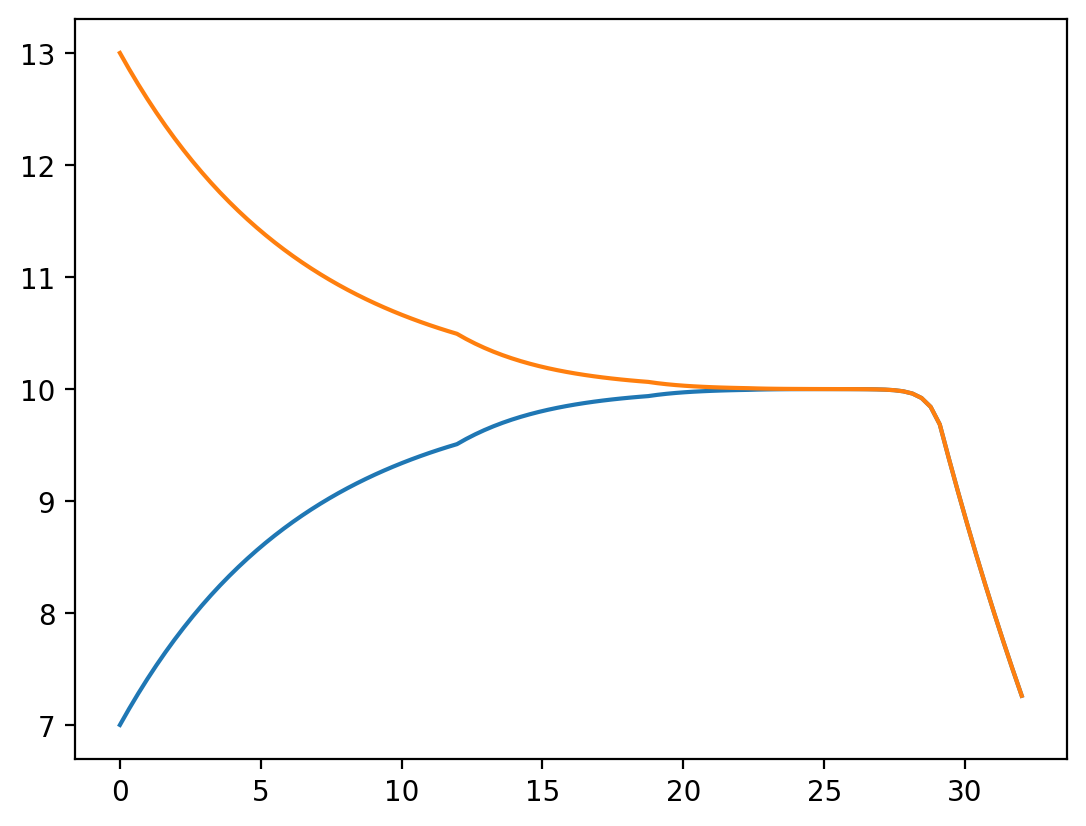

In [96]:
# Поиск точного решения
u = []
A = sympy.Matrix(A)
temp = A.eigenvects()
alfa1 = 250000000000000/58925565098879
alfa2 = -2500000000000000/176776695296637
lambda1 = temp[0][0]
lambda2 = temp[1][0]
W1 = temp[0][2][0]
W2 = temp[1][2][0]
x1  = x
n = i
for i in range(n):
    
    t = alfa1*W1*e**(lambda1*x1[i]) + alfa2*W2*e**(lambda2*x1[i])
    u.append(t)
U1 = []
U2 = []
time = np.linspace(0, max(x1), n)
for i in range(n):
    U1.append(u[i][0])
    U2.append(u[i][1])
plt.plot(time, U1)
plt.plot(time, U2)
u

In [78]:
# Расчет глобальной погрешности
E_1 = []
E_2 = []
n = i
for i in range(n):
    E_1.append(u[i][0] - v[i][0])
    E_2.append(u[i][1] - v[i][1])
print(E_2)


[-8.88178419700125e-15, 9.07268926653160e-10, 1.81012183020357e-9, 2.70856403972175e-9, 3.60261687148977e-9, 4.49229276000551e-9, 5.37760769248052e-9, 6.25858120884004e-9, 7.13522219086826e-9, 8.00755195484726e-9, 8.87558648798858e-9, 9.73933822479012e-9, 1.05988249288202e-8, 1.14540625872905e-8, 1.23050689637694e-8, 1.31518547163978e-8, 1.39944376087442e-8, 1.48328336280201e-8, 1.56670569850803e-8, 1.64971236671363e-8, 1.73230496613996e-8, 1.81448491787251e-8, 1.89625382063241e-8, 1.97761309550515e-8, 2.05856416357619e-8, 2.13910880120238e-8, 2.21924860710487e-8, 2.29898464709777e-8, 2.37831869753791e-8, 2.45725200187508e-8, 2.53578651410180e-8, 2.61392330003218e-8, 2.69166413602306e-8, 2.76901008788855e-8, 2.84596257671410e-8, 2.92252355649225e-8, 2.99869444830847e-8, 3.07447614034118e-8, 3.14987076421858e-8, 3.22487920811909e-8, 3.29950324839956e-8, 3.37374412850977e-8, 3.44760344717088e-8, 3.52108227019698e-8, 3.59418219630925e-8, 3.66690482422882e-8, 3.73925175267686e-8, 3.8112235